# Body Performance Dataset "gender" Classification

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset
data = pd.read_csv("bodyPerformance_index.csv")

In [3]:
data.head(15)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMIndex,situation,_systolic,_diastolic
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,25.344179,3,2,2
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4,20.495868,2,2,2
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,24.181428,2,3,3
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3,23.349562,2,3,2
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3,22.412439,2,2,2
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,3,20.250640,2,1,1
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,1,23.540063,2,3,2
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,3,25.236997,3,3,2
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,2,24.261167,2,3,2
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,3,24.718773,2,3,2


In [4]:
#control for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  int64  
 12  BMIndex                  13393 non-null  float64
 13  situation                13393 non-null  int64  
 14  _systolic             

In [5]:
#control for missing value
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
BMIndex                    0
situation                  0
_systolic                  0
_diastolic                 0
dtype: int64

In [6]:
#split the data for train, test and validation
gender = data["gender"].copy()
df = data.drop("gender" , axis=1)

In [7]:
gender.head(5)

0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [8]:
df.head(5)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMIndex,situation,_systolic,_diastolic
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,25.344179,3,2,2
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4,20.495868,2,2,2
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,24.181428,2,3,3
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3,23.349562,2,3,2
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3,22.412439,2,2,2


In [9]:
x_train , x_test , y_train , y_test = train_test_split(df , gender , random_state=0 , test_size=0.33 )

In [10]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((8973, 15), (4420, 15), (8973,), (4420,))

## Standardization

In [11]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)
x_train[0]

array([-0.04426308,  0.65131189,  0.06532479, -1.030314  ,  1.68981961,
        1.83391948,  0.63430154,  0.60125562,  0.56579406,  0.72259718,
        0.44852606, -0.36906438, -0.50372611,  0.94211077,  1.78733302])

In [12]:
X_train , X_val , Y_train , Y_val = train_test_split(x_train , y_train , random_state=0 , test_size=0.33)

In [13]:
x_train.shape , X_train.shape

((8973, 15), (6011, 15))

## Selecting the models

In [14]:
from sklearn.metrics import confusion_matrix


from sklearn.svm import SVC
svc = SVC(kernel="rbf")

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)

from sklearn.naive_bayes import GaussianNB , BernoulliNB
gnb = GaussianNB()
bnb = BernoulliNB()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver="lbfgs")

In [15]:
def model_fun(models , names , x_train , y_train , x_test , y_test):
    train_scores = []
    com = []
    
    for i in range(len(models)) :
        
        models[i].fit(x_train , y_train)
        pred = models[i].predict(x_test)
        com.append((names[i] , confusion_matrix(y_test , pred)))
        train_scores.append((names[i] , models[i].score(x_train , y_train)))
    
    tScors = [i[1] for i in train_scores]
    sns.barplot(x = tScors , y = [i[0] for i in train_scores] , palette="inferno")
    plt.title("Score")
    plt.xlim(min(tScors)-0.05,max(tScors)+0.005)
    plt.show()
    
    cScors = [(i[1][0,0] + i[1][1,1]) / (i[1].sum()) * 100 for i in com]
    sns.barplot(x = cScors , y = [i[0] for i in com] , palette="inferno")
    plt.title("Confusion Matrix")
    plt.xlim(min(cScors)-0.05,max(cScors)+0.005)
    plt.show()
    
    for i in com:
        print(i[0])
        print(i[1])
        print((i[1][0,0] + i[1][1,1]) / (i[1].sum()) * 100)

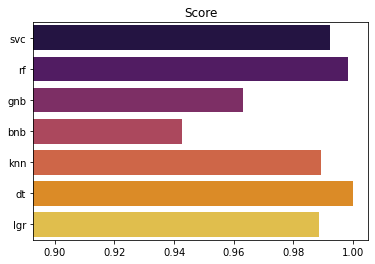

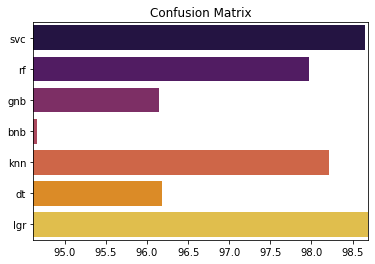

svc
[[1073   23]
 [  17 1849]]
98.6495611073599
rf
[[1070   26]
 [  34 1832]]
97.97434166103984
gnb
[[1050   46]
 [  68 1798]]
96.15124915597569
bnb
[[1043   53]
 [ 105 1761]]
94.66576637407157
knn
[[1065   31]
 [  22 1844]]
98.21066846725186
dt
[[1041   55]
 [  58 1808]]
96.1850101282917
lgr
[[1073   23]
 [  16 1850]]
98.68332207967589


In [16]:
model_fun(
    [svc , rf , gnb , bnb , knn , dt , lgr ],
    ["svc" , "rf" , "gnb" , "bnb" , "knn" , "dt" , "lgr"],
    X_train , Y_train , X_val , Y_val
)

* let's select **SVC**, **Knn**, **Lgr** and find their the best parameters.

In [17]:
from sklearn.model_selection import GridSearchCV

def the_best(model , param , name , x_train , y_train ):
    best_score = []
    best_param = []
    for i in range(len(model)):
        gs = GridSearchCV(estimator=model[i],
                  param_grid=param[i],
                  scoring="accuracy",
                  cv=5,
                  )
        grid_search = gs.fit(x_train , y_train)
        best_score.append((name[i] , grid_search.best_score_))
        best_param.append((name[i] , grid_search.best_params_))
    
    for i  in range(len(best_param)):
        print(best_score[i][0])
        print(best_score[i][1])
        print(best_param[i][0])
        print(best_param[i][1])

In [18]:
p_lgr = [{ "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"] , "multi_class" : ["auto", "ovr"]  , "max_iter":[10000]}]
p_svc = [{"kernel" : ["poly", "rbf", "sigmoid" , "linear"] , "gamma" : ["auto" , "scale"] 
          , "decision_function_shape" : ["ovo" , "ovr"]}]
p_knn = [{"n_neighbors" : [3,5,7] , "p" : [2,3]}]

In [19]:
the_best([lgr , svc , knn] , [p_lgr , p_svc , p_knn] , ["lgr" , "svc" , "knn"] , X_train , Y_train)

lgr
0.9885210711435498
lgr
{'max_iter': 10000, 'multi_class': 'auto', 'solver': 'liblinear'}
svc
0.9896855199770955
svc
{'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
knn
0.9850267564588252
knn
{'n_neighbors': 5, 'p': 2}


## Getting Accuracy from train and test dataset

In [20]:
svc = SVC(decision_function_shape= 'ovo', gamma= 'auto', kernel= 'rbf')
knn = KNeighborsClassifier(n_neighbors= 5, p= 2)
lgr = LogisticRegression(max_iter= 10000, multi_class= 'auto', solver= 'liblinear')

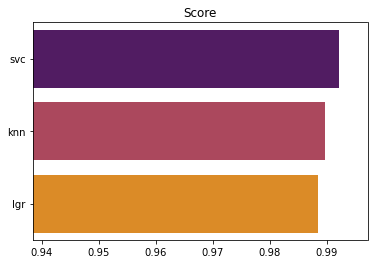

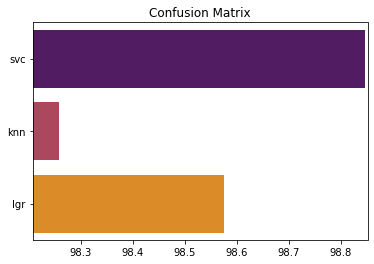

svc
[[1607   24]
 [  27 2762]]
98.84615384615385
knn
[[1591   40]
 [  37 2752]]
98.25791855203619
lgr
[[1601   30]
 [  33 2756]]
98.57466063348417


In [21]:
model_fun(
    [svc , knn, lgr ],
    ["svc" , "knn" , "lgr"],
    x_train , y_train , x_test ,y_test
)

* the best score is **SVC** with %98.84 accuracy

## Training A Model Without Feature Engineering

In [22]:
rowData = pd.read_csv("bodyPerformance_data.csv")
rowData.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3


In [23]:
#split the dataset for train, test, validation
r_gender = rowData["gender"].copy()
r_df = rowData.drop("gender", axis=1)

In [24]:
x_train , x_test , y_train , y_test = train_test_split(r_df , r_gender , random_state=0 , test_size=0.33 )

In [25]:
st2 = StandardScaler()
x_train = st2.fit_transform(x_train)
x_test = st2.transform(x_test)
x_train[0]

array([-0.04426308,  0.65131189,  0.06532479, -1.030314  ,  1.68981961,
        1.83391948,  0.63430154,  0.60125562,  0.56579406,  0.72259718,
        0.44852606])

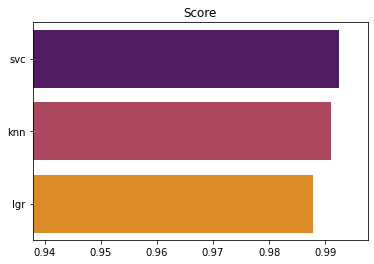

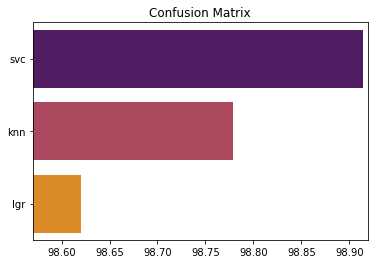

svc
[[1608   23]
 [  25 2764]]
98.91402714932127
knn
[[1601   30]
 [  24 2765]]
98.77828054298644
lgr
[[1602   29]
 [  32 2757]]
98.61990950226244


In [26]:
model_fun(
    [svc , knn, lgr ],
    ["svc" , "knn" , "lgr"],
    x_train , y_train , x_test ,y_test
)

* The best score is **98.91% SVC** without feature engineering 